Valid positions: 487
Min distance: 3.9682539682539684 pixels
Max distance: 11.904761904761905 pixels
Visibility radius: 7.936507936507937 pixels

Solving using CSP with backtracking...

Solution found in 0.00 seconds

--- CSP Solution: ---

Station 1: (1, 13)
Station 2: (1, 17)
Station 3: (2, 2)
Station 4: (2, 9)
Station 5: (5, 5)
Station 6: (5, 12)
Station 7: (5, 16)
Station 8: (6, 1)


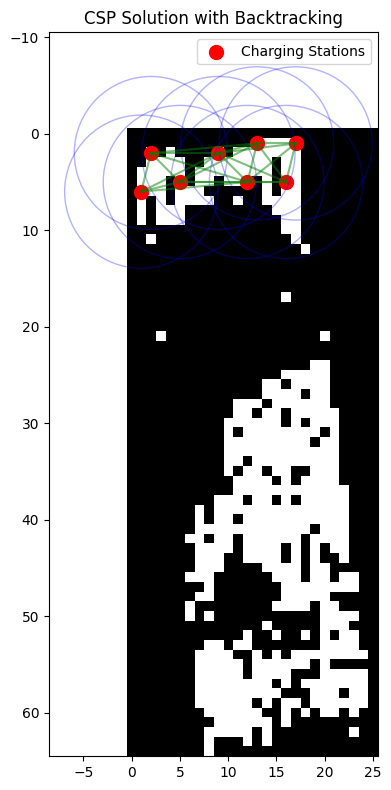

CSP solution visibility: 93 valid pixels

Solving using Simulated Annealing...

Iteration 0, Temperature: 990.00, Best visibility: 447
Iteration 200, Temperature: 260.09, Best visibility: 458
Iteration 700, Temperature: 12.38, Best visibility: 472
Iteration 900, Temperature: 3.09, Best visibility: 481
Iteration 1100, Temperature: 0.88, Best visibility: 481
Iteration 1200, Temperature: 0.45, Best visibility: 481
Iteration 1300, Temperature: 0.23, Best visibility: 481
Iteration 1400, Temperature: 0.13, Best visibility: 481
Simulated annealing completed in 1.07 seconds
Best visibility: 481 valid pixels

--- Simulated Annealing Solution: ---

Station 1: (8, 5)
Station 2: (42, 13)
Station 3: (45, 19)
Station 4: (59, 9)
Station 5: (5, 16)
Station 6: (31, 16)
Station 7: (54, 21)
Station 8: (50, 8)


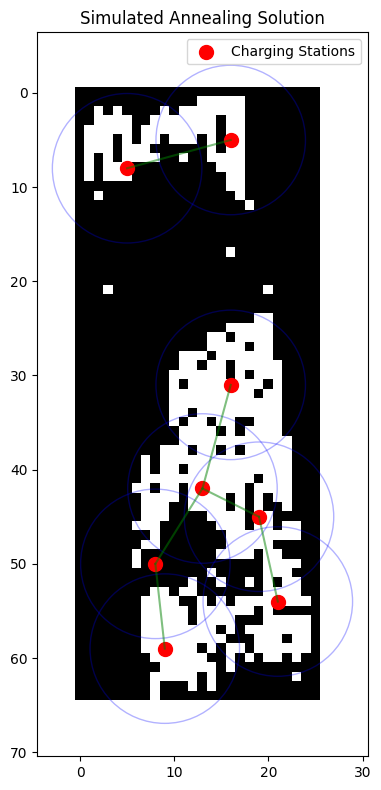


Solving using Greedy Search...

Iteration 300, Best visibility: 480
Iteration 400, Best visibility: 480
Iteration 600, Best visibility: 480
Iteration 800, Best visibility: 480
Iteration 900, Best visibility: 480
Iteration 1100, Best visibility: 480
Iteration 1400, Best visibility: 480
Iteration 1600, Best visibility: 480
Iteration 1800, Best visibility: 480
Iteration 2900, Best visibility: 480
Iteration 3200, Best visibility: 480
Iteration 3600, Best visibility: 480
Iteration 3800, Best visibility: 480
Iteration 4200, Best visibility: 480
Iteration 4500, Best visibility: 480
Iteration 4700, Best visibility: 480
Iteration 4900, Best visibility: 480
Iteration 5000, Best visibility: 480
Iteration 5400, Best visibility: 480
Iteration 5800, Best visibility: 480
Iteration 5900, Best visibility: 480
Iteration 6100, Best visibility: 480
Iteration 6200, Best visibility: 480
Iteration 7300, Best visibility: 480
Iteration 7400, Best visibility: 480
Iteration 8100, Best visibility: 480
Iteration 

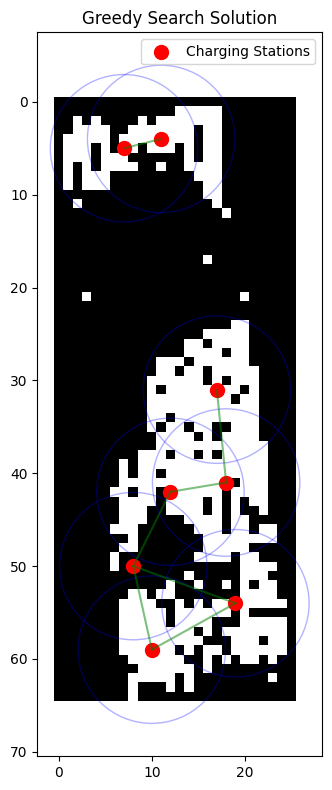


--- Results comparison: ---
CSP visibility: 93 valid pixels
Simulated Annealing visibility: 481 valid pixels
Greedy Search visibility: 480 valid pixels


In [1]:
#------------------------------------------------------------------------------------------------------------------
#   Optimized Mars Charging Station Placer utilizing Backtracking, Hill Climbing and Simmulated Annealing
#   
#   Each station must be at least 1 kilometer away from any other charging station.
#   The distance from one charging station to the nearest station must be no more than 3 kilometers.
#------------------------------------------------------------------------------------------------------------------

#------------------------------------------------------------------------------------------------------------------
#   Imports
#------------------------------------------------------------------------------------------------------------------

import numpy as np
import matplotlib.pyplot as plt
import math
import random
import time
from collections import defaultdict

#------------------------------------------------------------------------------------------------------------------
#   ChargingStationPlacer Class -- Problem Formulation
#
#   Handles grid-based placement of charging stations by evaluating terrain constraints
#   and using optimization techniques from the SimpleAI library.
#------------------------------------------------------------------------------------------------------------------

class ChargingStationPlacer:
    def __init__(self, map_file="tiles.npy", scale=252):
        """
        Initialize the charging station placement problem
        
        Parameters:
        map_file: File containing the valid zones map (0 or 1 values)
        scale: Scale in meters per pixel (252m per pixel in this case)
        """
        self.valid_zones = np.load(map_file)
        self.scale = scale
        self.rows, self.cols = self.valid_zones.shape
        
        # Find all valid positions (where value is 1)
        self.valid_positions = []
        for r in range(self.rows):
            for c in range(self.cols):
                if self.valid_zones[r, c] == 1:
                    self.valid_positions.append((r, c))
        
        # Convert distance requirements from km to pixels
        self.min_dist_pixels = 1000 / self.scale  # 1km minimum between stations
        self.max_dist_pixels = 3000 / self.scale  # 3km maximum to nearest station
        self.visibility_radius_pixels = 2000 / self.scale  # 2km visibility radius
        
        print(f"Valid positions: {len(self.valid_positions)}")
        print(f"Min distance: {self.min_dist_pixels} pixels")
        print(f"Max distance: {self.max_dist_pixels} pixels")
        print(f"Visibility radius: {self.visibility_radius_pixels} pixels")
    
    def euclidean_distance(self, pos1, pos2):
        """Calculate Euclidean distance between two positions"""
        return math.sqrt((pos1[0] - pos2[0])**2 + (pos1[1] - pos2[1])**2)
    
    def is_min_distance_satisfied(self, stations, new_pos):
        """Check if new position satisfies minimum distance constraint"""
        for station in stations:
            if self.euclidean_distance(station, new_pos) < self.min_dist_pixels:
                return False
        return True
    
    def is_max_distance_satisfied(self, stations):
        """
        Check if maximum distance constraint is satisfied for all stations
        Each station must have at least one other station within max_dist_pixels
        """
        for i, station1 in enumerate(stations):
            has_nearby_station = False
            for j, station2 in enumerate(stations):
                if i != j and self.euclidean_distance(station1, station2) <= self.max_dist_pixels:
                    has_nearby_station = True
                    break
            if not has_nearby_station:
                return False
        return True
    
    def backtracking_search(self, num_stations=8):
        """Solve the CSP using backtracking"""
        start_time = time.time()
        result = self.backtrack([], num_stations)
        end_time = time.time()
        
        if result:
            print(f"Solution found in {end_time - start_time:.2f} seconds")
            return result
        else:
            print("No solution found")
            return None
    
    def backtrack(self, assignment, num_stations):
        """Recursive backtracking function"""
        if len(assignment) == num_stations:
            # Check if max distance constraint is satisfied
            if self.is_max_distance_satisfied(assignment):
                return assignment
            return None
        
        # Try each valid position
        for pos in self.valid_positions:
            # Skip if this position is already assigned
            if pos in assignment:
                continue
                
            # Check if minimum distance constraint is satisfied
            if self.is_min_distance_satisfied(assignment, pos):
                # Add this position to assignment
                assignment.append(pos)
                
                # Recursively try to complete the assignment
                result = self.backtrack(assignment, num_stations)
                if result:
                    return result
                
                # If we get here, backtrack
                assignment.pop()
        
        return None
    
    def calculate_visibility(self, stations):
        """Calculate the total visible area (valid pixels) within visibility radius"""
        visible_pixels = set()
        
        for station in stations:
            r, c = station
            
            # Check pixels within the visibility radius
            r_min = max(0, int(r - self.visibility_radius_pixels))
            r_max = min(self.rows - 1, int(r + self.visibility_radius_pixels))
            c_min = max(0, int(c - self.visibility_radius_pixels))
            c_max = min(self.cols - 1, int(c + self.visibility_radius_pixels))
            
            for i in range(r_min, r_max + 1):
                for j in range(c_min, c_max + 1):
                    # Check if pixel is valid and within visibility radius
                    if (self.valid_zones[i, j] == 1 and 
                        self.euclidean_distance((r, c), (i, j)) <= self.visibility_radius_pixels):
                        visible_pixels.add((i, j))
        
        return len(visible_pixels)
    
    def random_valid_stations(self, num_stations=8, max_attempts=1000):
        """Generate random valid station positions"""
        stations = []
        attempts = 0
        
        while len(stations) < num_stations and attempts < max_attempts:
            # Select a random valid position
            pos = random.choice(self.valid_positions)
            
            if self.is_min_distance_satisfied(stations, pos):
                stations.append(pos)
            
            attempts += 1
        
        # If we couldn't place all stations, return None
        if len(stations) < num_stations:
            return None
            
        # Check max distance constraint
        if not self.is_max_distance_satisfied(stations):
            return None
            
        return stations
    
    def simulated_annealing(self, num_stations=8, initial_temp=1000, cooling_rate=0.99, 
                            iterations=10000, max_attempts_initial=10000):
        """Solve using simulated annealing"""
        start_time = time.time()
        
        # Generate initial solution
        current_solution = None
        attempts = 0
        while current_solution is None and attempts < 10:
            current_solution = self.random_valid_stations(num_stations, max_attempts_initial)
            attempts += 1
        
        if current_solution is None:
            print("Failed to generate initial solution")
            return None
        
        current_visibility = self.calculate_visibility(current_solution)
        best_solution = current_solution.copy()
        best_visibility = current_visibility
        
        temp = initial_temp
        
        for i in range(iterations):
            if temp < 0.1:
                break
                
            # Create a neighbor solution by replacing one station
            neighbor = current_solution.copy()
            
            # Remove a random station
            idx_to_remove = random.randrange(num_stations)
            removed_station = neighbor.pop(idx_to_remove)
            
            # Try to add a new station
            available_positions = [pos for pos in self.valid_positions 
                                  if pos not in neighbor and self.is_min_distance_satisfied(neighbor, pos)]
            
            if not available_positions:
                # Put back the removed station
                neighbor.insert(idx_to_remove, removed_station)
                continue
                
            # Add a new station
            new_station = random.choice(available_positions)
            neighbor.append(new_station)
            
            # Check if the neighbor solution satisfies the max distance constraint
            if not self.is_max_distance_satisfied(neighbor):
                continue
                
            # Calculate visibility for the neighbor
            neighbor_visibility = self.calculate_visibility(neighbor)
            
            # Decide whether to accept the neighbor
            delta_visibility = neighbor_visibility - current_visibility
            
            if delta_visibility > 0 or random.random() < math.exp(delta_visibility / temp):
                current_solution = neighbor
                current_visibility = neighbor_visibility
                
                # Update best solution if needed
                if current_visibility > best_visibility:
                    best_solution = current_solution.copy()
                    best_visibility = current_visibility
            
            # Cool down
            temp *= cooling_rate
            
            if i % 100 == 0:
                print(f"Iteration {i}, Temperature: {temp:.2f}, Best visibility: {best_visibility}")
        
        end_time = time.time()
        print(f"Simulated annealing completed in {end_time - start_time:.2f} seconds")
        print(f"Best visibility: {best_visibility} valid pixels")
        
        return best_solution
    
    def greedy_search(self, num_stations=8, max_iterations=20000):
        """Solve using greedy search"""
        start_time = time.time()
        
        best_solution = None
        best_visibility = 0
        
        for i in range(max_iterations):
            # Generate a random valid starting solution
            current_solution = self.random_valid_stations(num_stations)
            if current_solution is None:
                continue
                
            current_visibility = self.calculate_visibility(current_solution)
            
            if current_visibility > best_visibility:
                best_solution = current_solution
                best_visibility = current_visibility
            
            if i % 100 == 0:
                print(f"Iteration {i}, Best visibility: {best_visibility}")
        
        end_time = time.time()
        print(f"Greedy search completed in {end_time - start_time:.2f} seconds")
        print(f"Best visibility: {best_visibility} valid pixels")
        
        return best_solution
    
#------------------------------------------------------------------------------------------------------------------
#   Map Loading and Preprocessing
#
#   Reads the grid from a file and prepares data structures for optimization.
#------------------------------------------------------------------------------------------------------------------

    def plot_solution(self, stations, title="Charging Station Placement"):
        """Plot the map with charging stations"""
        plt.figure(figsize=(10, 8))
        
        # Plot valid zones
        plt.imshow(self.valid_zones, cmap='gray', interpolation='nearest')
        
        # Plot stations
        station_r = [s[0] for s in stations]
        station_c = [s[1] for s in stations]
        plt.scatter(station_c, station_r, c='red', s=100, marker='o', label='Charging Stations')
        
        # Draw visibility circles
        for station in stations:
            r, c = station
            circle = plt.Circle((c, r), self.visibility_radius_pixels, color='blue', 
                               fill=False, alpha=0.3)
            plt.gca().add_patch(circle)
        
        # Draw lines between stations to show connectivity
        for i, station1 in enumerate(stations):
            for j, station2 in enumerate(stations):
                if i < j:  # Avoid drawing the same line twice
                    r1, c1 = station1
                    r2, c2 = station2
                    dist = self.euclidean_distance(station1, station2)
                    
                    if dist <= self.max_dist_pixels:
                        plt.plot([c1, c2], [r1, r2], 'g-', alpha=0.5)
        
        plt.title(title)
        plt.legend()
        plt.tight_layout()
        plt.show()

#------------------------------------------------------------------------------------------------------------------
#   Main Program
#------------------------------------------------------------------------------------------------------------------

def main():
    # Load map and solve problem
    placer = ChargingStationPlacer()
    
    # Solve using CSP with backtracking
    print("\nSolving using CSP with backtracking...\n")
    csp_solution = placer.backtracking_search()
    
    if csp_solution:
        print("\n--- CSP Solution: ---\n")
        for i, station in enumerate(csp_solution):
            print(f"Station {i+1}: {station}")
        placer.plot_solution(csp_solution, "CSP Solution with Backtracking")
        
        # Calculate visibility for CSP solution
        csp_visibility = placer.calculate_visibility(csp_solution)
        print(f"CSP solution visibility: {csp_visibility} valid pixels")
    
    # Solve using simulated annealing
    print("\nSolving using Simulated Annealing...\n")
    sa_solution = placer.simulated_annealing()
    
    if sa_solution:
        print("\n--- Simulated Annealing Solution: ---\n")
        for i, station in enumerate(sa_solution):
            print(f"Station {i+1}: {station}")
        placer.plot_solution(sa_solution, "Simulated Annealing Solution")
    
    # Solve using greedy search
    print("\nSolving using Greedy Search...\n")
    greedy_solution = placer.greedy_search()
    
    if greedy_solution:
        print("\n--- Greedy Search Solution: ---\n")
        for i, station in enumerate(greedy_solution):
            print(f"Station {i+1}: {station}")
        placer.plot_solution(greedy_solution, "Greedy Search Solution")
    
    # Compare results
    if csp_solution and sa_solution and greedy_solution:
        csp_visibility = placer.calculate_visibility(csp_solution)
        sa_visibility = placer.calculate_visibility(sa_solution)
        greedy_visibility = placer.calculate_visibility(greedy_solution)
        
        print("\n--- Results comparison: ---")
        print(f"CSP visibility: {csp_visibility} valid pixels")
        print(f"Simulated Annealing visibility: {sa_visibility} valid pixels")
        print(f"Greedy Search visibility: {greedy_visibility} valid pixels")

if __name__ == "__main__":
    main()

#------------------------------------------------------------------------------------------------------------------
#   End of file
#------------------------------------------------------------------------------------------------------------------

Valid positions: 487
Min distance: 3.9682539682539684 pixels
Max distance: 11.904761904761905 pixels
Visibility radius: 7.936507936507937 pixels

Solving using Simulated Annealing...

Iteration 100, Temperature: 499.84, Best visibility: 458
Iteration 300, Temperature: 133.98, Best visibility: 470
Iteration 400, Temperature: 66.97, Best visibility: 472
Iteration 600, Temperature: 17.77, Best visibility: 478
Iteration 700, Temperature: 8.71, Best visibility: 478
Iteration 800, Temperature: 4.96, Best visibility: 478
Iteration 900, Temperature: 2.91, Best visibility: 481
Iteration 1000, Temperature: 1.67, Best visibility: 484
Iteration 1200, Temperature: 0.59, Best visibility: 485
Simulated annealing completed in 0.99 seconds
Best visibility: 485 valid pixels

--- Simulated Annealing Solution: ---

Station 1: (58, 20)
Station 2: (57, 10)
Station 3: (45, 20)
Station 4: (6, 6)
Station 5: (43, 9)
Station 6: (34, 16)
Station 7: (6, 17)
Station 8: (26, 18)


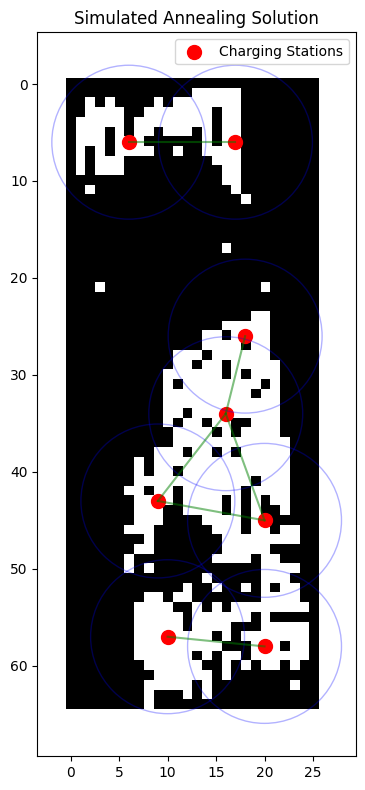


Solving using Greedy Search...

Iteration 400, Best visibility: 465
Iteration 500, Best visibility: 470
Iteration 600, Best visibility: 470
Iteration 800, Best visibility: 470
Iteration 900, Best visibility: 470
Iteration 1200, Best visibility: 470
Iteration 1400, Best visibility: 475
Iteration 1500, Best visibility: 475
Iteration 1900, Best visibility: 475
Iteration 2100, Best visibility: 475
Iteration 2200, Best visibility: 475
Iteration 2400, Best visibility: 475
Iteration 2600, Best visibility: 475
Iteration 3400, Best visibility: 475
Iteration 3500, Best visibility: 475
Iteration 3700, Best visibility: 475
Iteration 4200, Best visibility: 475
Iteration 4400, Best visibility: 475
Iteration 4600, Best visibility: 475
Iteration 5500, Best visibility: 475
Iteration 6200, Best visibility: 475
Iteration 6500, Best visibility: 475
Iteration 6600, Best visibility: 475
Iteration 6900, Best visibility: 475
Iteration 7200, Best visibility: 475
Iteration 7300, Best visibility: 475
Iteration 

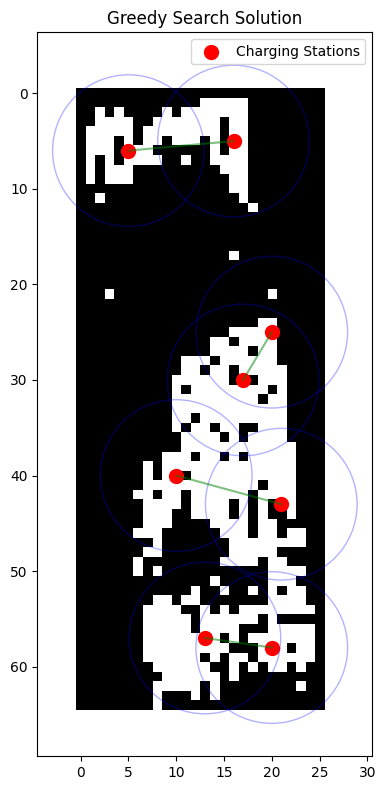


--- Results comparison: ---
Simulated Annealing visibility: 485 valid pixels
Greedy Search visibility: 478 valid pixels


In [2]:
#------------------------------------------------------------------------------------------------------------------
#   Optimized Mars Charging Station Placer utilizing Greedy Search and Simulated Annealing
#   
#   Each station must be at least 1 kilometer away from any other charging station.
#   The distance from one charging station to the nearest station must be no more than 3 kilometers.
#------------------------------------------------------------------------------------------------------------------

#------------------------------------------------------------------------------------------------------------------
#   Imports
#------------------------------------------------------------------------------------------------------------------

import numpy as np
import matplotlib.pyplot as plt
import math
import random
import time
from collections import defaultdict

#------------------------------------------------------------------------------------------------------------------
#   ChargingStationPlacer Class -- Problem Formulation
#
#   Handles grid-based placement of charging stations by evaluating terrain constraints
#   and using optimization techniques.
#------------------------------------------------------------------------------------------------------------------

class ChargingStationPlacer:
    def __init__(self, map_file="tiles.npy", scale=252):
        """
        Initialize the charging station placement problem
        
        Parameters:
        map_file: File containing the valid zones map (0 or 1 values)
        scale: Scale in meters per pixel (252m per pixel in this case)
        """
        self.valid_zones = np.load(map_file)
        self.scale = scale
        self.rows, self.cols = self.valid_zones.shape
        
        # Find all valid positions (where value is 1)
        self.valid_positions = []
        for r in range(self.rows):
            for c in range(self.cols):
                if self.valid_zones[r, c] == 1:
                    self.valid_positions.append((r, c))
        
        # Convert distance requirements from km to pixels
        self.min_dist_pixels = 1000 / self.scale  # 1km minimum between stations
        self.max_dist_pixels = 3000 / self.scale  # 3km maximum to nearest station
        self.visibility_radius_pixels = 2000 / self.scale  # 2km visibility radius
        
        print(f"Valid positions: {len(self.valid_positions)}")
        print(f"Min distance: {self.min_dist_pixels} pixels")
        print(f"Max distance: {self.max_dist_pixels} pixels")
        print(f"Visibility radius: {self.visibility_radius_pixels} pixels")
    
    def euclidean_distance(self, pos1, pos2):
        """Calculate Euclidean distance between two positions"""
        return math.sqrt((pos1[0] - pos2[0])**2 + (pos1[1] - pos2[1])**2)
    
    def is_min_distance_satisfied(self, stations, new_pos):
        """Check if new position satisfies minimum distance constraint"""
        for station in stations:
            if self.euclidean_distance(station, new_pos) < self.min_dist_pixels:
                return False
        return True
    
    def is_max_distance_satisfied(self, stations):
        """
        Check if maximum distance constraint is satisfied for all stations
        Each station must have at least one other station within max_dist_pixels
        """
        for i, station1 in enumerate(stations):
            has_nearby_station = False
            for j, station2 in enumerate(stations):
                if i != j and self.euclidean_distance(station1, station2) <= self.max_dist_pixels:
                    has_nearby_station = True
                    break
            if not has_nearby_station:
                return False
        return True
    
    def calculate_visibility(self, stations):
        """Calculate the total visible area (valid pixels) within visibility radius"""
        visible_pixels = set()
        
        for station in stations:
            r, c = station
            
            # Check pixels within the visibility radius
            r_min = max(0, int(r - self.visibility_radius_pixels))
            r_max = min(self.rows - 1, int(r + self.visibility_radius_pixels))
            c_min = max(0, int(c - self.visibility_radius_pixels))
            c_max = min(self.cols - 1, int(c + self.visibility_radius_pixels))
            
            for i in range(r_min, r_max + 1):
                for j in range(c_min, c_max + 1):
                    # Check if pixel is valid and within visibility radius
                    if (self.valid_zones[i, j] == 1 and 
                        self.euclidean_distance((r, c), (i, j)) <= self.visibility_radius_pixels):
                        visible_pixels.add((i, j))
        
        return len(visible_pixels)
    
    def random_valid_stations(self, num_stations=8, max_attempts=1000):
        """Generate random valid station positions"""
        stations = []
        attempts = 0
        
        while len(stations) < num_stations and attempts < max_attempts:
            # Select a random valid position
            pos = random.choice(self.valid_positions)
            
            if self.is_min_distance_satisfied(stations, pos):
                stations.append(pos)
            
            attempts += 1
        
        # If we couldn't place all stations, return None
        if len(stations) < num_stations:
            return None
            
        # Check max distance constraint
        if not self.is_max_distance_satisfied(stations):
            return None
            
        return stations
    
    def simulated_annealing(self, num_stations=8, initial_temp=1000, cooling_rate=0.99, 
                            iterations=10000, max_attempts_initial=10000):
        """Solve using simulated annealing"""
        start_time = time.time()
        
        # Generate initial solution
        current_solution = None
        attempts = 0
        while current_solution is None and attempts < 10:
            current_solution = self.random_valid_stations(num_stations, max_attempts_initial)
            attempts += 1
        
        if current_solution is None:
            print("Failed to generate initial solution")
            return None
        
        current_visibility = self.calculate_visibility(current_solution)
        best_solution = current_solution.copy()
        best_visibility = current_visibility
        
        temp = initial_temp
        
        for i in range(iterations):
            if temp < 0.1:
                break
                
            # Create a neighbor solution by replacing one station
            neighbor = current_solution.copy()
            
            # Remove a random station
            idx_to_remove = random.randrange(num_stations)
            removed_station = neighbor.pop(idx_to_remove)
            
            # Try to add a new station
            available_positions = [pos for pos in self.valid_positions 
                                  if pos not in neighbor and self.is_min_distance_satisfied(neighbor, pos)]
            
            if not available_positions:
                # Put back the removed station
                neighbor.insert(idx_to_remove, removed_station)
                continue
                
            # Add a new station
            new_station = random.choice(available_positions)
            neighbor.append(new_station)
            
            # Check if the neighbor solution satisfies the max distance constraint
            if not self.is_max_distance_satisfied(neighbor):
                continue
                
            # Calculate visibility for the neighbor
            neighbor_visibility = self.calculate_visibility(neighbor)
            
            # Decide whether to accept the neighbor
            delta_visibility = neighbor_visibility - current_visibility
            
            if delta_visibility > 0 or random.random() < math.exp(delta_visibility / temp):
                current_solution = neighbor
                current_visibility = neighbor_visibility
                
                # Update best solution if needed
                if current_visibility > best_visibility:
                    best_solution = current_solution.copy()
                    best_visibility = current_visibility
            
            # Cool down
            temp *= cooling_rate
            
            if i % 100 == 0:
                print(f"Iteration {i}, Temperature: {temp:.2f}, Best visibility: {best_visibility}")
        
        end_time = time.time()
        print(f"Simulated annealing completed in {end_time - start_time:.2f} seconds")
        print(f"Best visibility: {best_visibility} valid pixels")
        
        return best_solution
    
    def greedy_search(self, num_stations=8, max_iterations=20000):
        """Solve using greedy search"""
        start_time = time.time()
        
        best_solution = None
        best_visibility = 0
        
        for i in range(max_iterations):
            # Generate a random valid starting solution
            current_solution = self.random_valid_stations(num_stations)
            if current_solution is None:
                continue
                
            current_visibility = self.calculate_visibility(current_solution)
            
            if current_visibility > best_visibility:
                best_solution = current_solution
                best_visibility = current_visibility
            
            if i % 100 == 0:
                print(f"Iteration {i}, Best visibility: {best_visibility}")
        
        end_time = time.time()
        print(f"Greedy search completed in {end_time - start_time:.2f} seconds")
        print(f"Best visibility: {best_visibility} valid pixels")
        
        return best_solution
    
    def plot_solution(self, stations, title="Charging Station Placement"):
        """Plot the map with charging stations"""
        plt.figure(figsize=(10, 8))
        
        # Plot valid zones
        plt.imshow(self.valid_zones, cmap='gray', interpolation='nearest')
        
        # Plot stations
        station_r = [s[0] for s in stations]
        station_c = [s[1] for s in stations]
        plt.scatter(station_c, station_r, c='red', s=100, marker='o', label='Charging Stations')
        
        # Draw visibility circles
        for station in stations:
            r, c = station
            circle = plt.Circle((c, r), self.visibility_radius_pixels, color='blue', 
                               fill=False, alpha=0.3)
            plt.gca().add_patch(circle)
        
        # Draw lines between stations to show connectivity
        for i, station1 in enumerate(stations):
            for j, station2 in enumerate(stations):
                if i < j:  # Avoid drawing the same line twice
                    r1, c1 = station1
                    r2, c2 = station2
                    dist = self.euclidean_distance(station1, station2)
                    
                    if dist <= self.max_dist_pixels:
                        plt.plot([c1, c2], [r1, r2], 'g-', alpha=0.5)
        
        plt.title(title)
        plt.legend()
        plt.tight_layout()
        plt.show()

#------------------------------------------------------------------------------------------------------------------
#   Main Program
#------------------------------------------------------------------------------------------------------------------

def main():
    # Load map and solve problem
    placer = ChargingStationPlacer()
    
    # Solve using simulated annealing
    print("\nSolving using Simulated Annealing...\n")
    sa_solution = placer.simulated_annealing()
    
    if sa_solution:
        print("\n--- Simulated Annealing Solution: ---\n")
        for i, station in enumerate(sa_solution):
            print(f"Station {i+1}: {station}")
        placer.plot_solution(sa_solution, "Simulated Annealing Solution")
    
    # Solve using greedy search
    print("\nSolving using Greedy Search...\n")
    greedy_solution = placer.greedy_search()
    
    if greedy_solution:
        print("\n--- Greedy Search Solution: ---\n")
        for i, station in enumerate(greedy_solution):
            print(f"Station {i+1}: {station}")
        placer.plot_solution(greedy_solution, "Greedy Search Solution")
    
    # Compare results
    if sa_solution and greedy_solution:
        sa_visibility = placer.calculate_visibility(sa_solution)
        greedy_visibility = placer.calculate_visibility(greedy_solution)
        
        print("\n--- Results comparison: ---")
        print(f"Simulated Annealing visibility: {sa_visibility} valid pixels")
        print(f"Greedy Search visibility: {greedy_visibility} valid pixels")

if __name__ == "__main__":
    main()

#------------------------------------------------------------------------------------------------------------------
#   End of file
#------------------------------------------------------------------------------------------------------------------

In [3]:
#------------------------------------------------------------------------------------------------------------------
#   Mars Charging Station Placement using the backtracking algorithm
#------------------------------------------------------------------------------------------------------------------

#------------------------------------------------------------------------------------------------------------------
#   Imports
#------------------------------------------------------------------------------------------------------------------
import numpy as np
import matplotlib.pyplot as plt
from simpleai.search import CspProblem, backtrack
import math

#------------------------------------------------------------------------------------------------------------------
#   Helper functions
#------------------------------------------------------------------------------------------------------------------
def euclidean_distance(pos1, pos2):
    """Calculate Euclidean distance between two positions"""
    return math.sqrt((pos1[0] - pos2[0])**2 + (pos1[1] - pos2[1])**2)

# Contador global de iteraciones
iteration_count = 0

def debug_print_constraint_progress(names, values):
    """Muestra cuántas estaciones han sido asignadas hasta ahora y detiene si supera el límite"""
    global iteration_count
    iteration_count += 1
    
    # Mostrar progreso cada X iteraciones
    if iteration_count % 100_000 == 0:
        print(f"[Iteration {iteration_count}] Checking constraints for {len(values)} stations assigned")
    
    # DETENER si supera el límite
    if iteration_count > 500_000_000:
        print("Reached iteration limit without finding a solution.")
        exit()  # Esto detiene el programa de inmediato

#------------------------------------------------------------------------------------------------------------------
#   Constraint functions
#------------------------------------------------------------------------------------------------------------------
def no_overlap(names, values):
    debug_print_constraint_progress(names, values)
    return len(values) == len(set(values))

def min_distance_constraint(names, values, min_dist):
    for i in range(len(values)):
        for j in range(i + 1, len(values)):
            if euclidean_distance(values[i], values[j]) < min_dist:
                return False
    return True

def max_distance_constraint(names, values, max_dist):
    for i, station1 in enumerate(values):
        has_nearby = False
        for j, station2 in enumerate(values):
            if i != j and euclidean_distance(station1, station2) <= max_dist:
                has_nearby = True
                break
        if not has_nearby:
            return False
    return True

#------------------------------------------------------------------------------------------------------------------
#   Visualization
#------------------------------------------------------------------------------------------------------------------
def plot_solution(valid_zones, stations, visibility_radius_pixels, max_dist_pixels, title="Charging Station Placement"):
    """Plot the map with charging stations"""
    plt.figure(figsize=(6, 10))
    
    # Plot valid zones
    plt.imshow(valid_zones, cmap='gray', interpolation='nearest')
    
    # Plot stations
    station_r = [s[0] for s in stations]
    station_c = [s[1] for s in stations]
    plt.scatter(station_c, station_r, c='red', s=100, marker='o', label='Charging Stations')
    
    # Draw visibility circles
    for station in stations:
        r, c = station
        circle = plt.Circle((c, r), visibility_radius_pixels, color='blue', fill=False, alpha=0.3)
        plt.gca().add_patch(circle)
    
    # Draw lines between stations to show connectivity
    for i, station1 in enumerate(stations):
        for j, station2 in enumerate(stations):
            if i < j:
                r1, c1 = station1
                r2, c2 = station2
                dist = euclidean_distance(station1, station2)
                if dist <= max_dist_pixels:
                    plt.plot([c1, c2], [r1, r2], 'g-', alpha=0.5)
    
    plt.title(title)
    plt.legend()
    plt.tight_layout()
    plt.show()

#------------------------------------------------------------------------------------------------------------------
#   Main Program
#------------------------------------------------------------------------------------------------------------------
def main():
    #--------------------------------------------------------------
    # Load the valid zones map and define parameters
    #--------------------------------------------------------------
    map_file = "tiles.npy"  # Load your map here
    scale = 252  # meters per pixel
    
    valid_zones = np.load(map_file)
    rows, cols = valid_zones.shape
    
    valid_positions = [
        (r, c)
        for r in range(rows)
        for c in range(cols)
        if valid_zones[r, c] == 1
    ]
    
    min_dist_pixels = 1000 / scale
    max_dist_pixels = 3000 / scale
    visibility_radius_pixels = 2000 / scale
    
    print(f"Valid positions: {len(valid_positions)}")
    print(f"Min distance (pixels): {min_dist_pixels}")
    print(f"Max distance (pixels): {max_dist_pixels}")
    
    #--------------------------------------------------------------
    # Define variables and domains
    #--------------------------------------------------------------
    num_stations = 8
    variables = [f'Station{i+1}' for i in range(num_stations)]
    domains = {var: valid_positions for var in variables}
    
    #--------------------------------------------------------------
    # Define constraints
    #--------------------------------------------------------------
    constraints = [
        (tuple(variables), no_overlap),
        (tuple(variables), lambda names, values: min_distance_constraint(names, values, min_dist_pixels)),
        (tuple(variables), lambda names, values: max_distance_constraint(names, values, max_dist_pixels)),
    ]

    #--------------------------------------------------------------
    # Solve the problem using backtracking with heuristics
    #--------------------------------------------------------------
    problem = CspProblem(variables, domains, constraints)
    solution = backtrack(problem,
                     inference='forward',
                     variable_heuristic='mrv',
                     value_heuristic='lcv')
    
    #--------------------------------------------------------------
    # Output the solution
    #--------------------------------------------------------------
    print('-----Solution-----')
    if solution:
        for station in variables:
            print(f"{station} located at {solution[station]}")
        
        # Plot the solution
        plot_solution(valid_zones, [solution[station] for station in variables], 
                      visibility_radius_pixels, max_dist_pixels, 
                      title="Backtracking Solution")
    else:
        print("No solution found!")

#------------------------------------------------------------------------------------------------------------------
#   Run program
#------------------------------------------------------------------------------------------------------------------
if __name__ == "__main__":
    main()

#------------------------------------------------------------------------------------------------------------------
#   End of file
#------------------------------------------------------------------------------------------------------------------

Valid positions: 487
Min distance (pixels): 3.9682539682539684
Max distance (pixels): 11.904761904761905
[Iteration 100000] Checking constraints for 8 stations assigned
[Iteration 200000] Checking constraints for 8 stations assigned
[Iteration 300000] Checking constraints for 8 stations assigned
[Iteration 400000] Checking constraints for 8 stations assigned
[Iteration 500000] Checking constraints for 8 stations assigned
[Iteration 600000] Checking constraints for 8 stations assigned
[Iteration 700000] Checking constraints for 8 stations assigned
[Iteration 800000] Checking constraints for 8 stations assigned
[Iteration 900000] Checking constraints for 8 stations assigned
[Iteration 1000000] Checking constraints for 8 stations assigned
[Iteration 1100000] Checking constraints for 8 stations assigned
[Iteration 1200000] Checking constraints for 8 stations assigned
[Iteration 1300000] Checking constraints for 8 stations assigned
[Iteration 1400000] Checking constraints for 8 stations ass

KeyboardInterrupt: 